In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.groupby(["Pclass"], as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df.groupby(["Sex"], as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df.groupby(["SibSp"], as_index=False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df.groupby(["Parch"], as_index=False)["Survived"].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [12]:
train_df["Family Size"] = train_df["Parch"] + train_df["SibSp"] + 1
test_df["Family Size"] = test_df["Parch"] + test_df["SibSp"] + 1

In [13]:
train_df.groupby(["Family Size"], as_index=False)["Survived"].mean()

,Family Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [14]:
family_size_map = {1:'Single', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
train_df["Family Size Mapped"] = train_df["Family Size"].map(family_size_map)
test_df["Family Size Mapped"] = test_df["Family Size"].map(family_size_map)


In [15]:
train_df.groupby(["Family Size Mapped"], as_index=False)["Survived"].mean()

,Family Size Mapped,Survived
0,Large,0.160000
1,Medium,0.162162
2,Single,0.303538
3,Small,0.578767


In [16]:
train_df.groupby(["Embarked"], as_index=False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


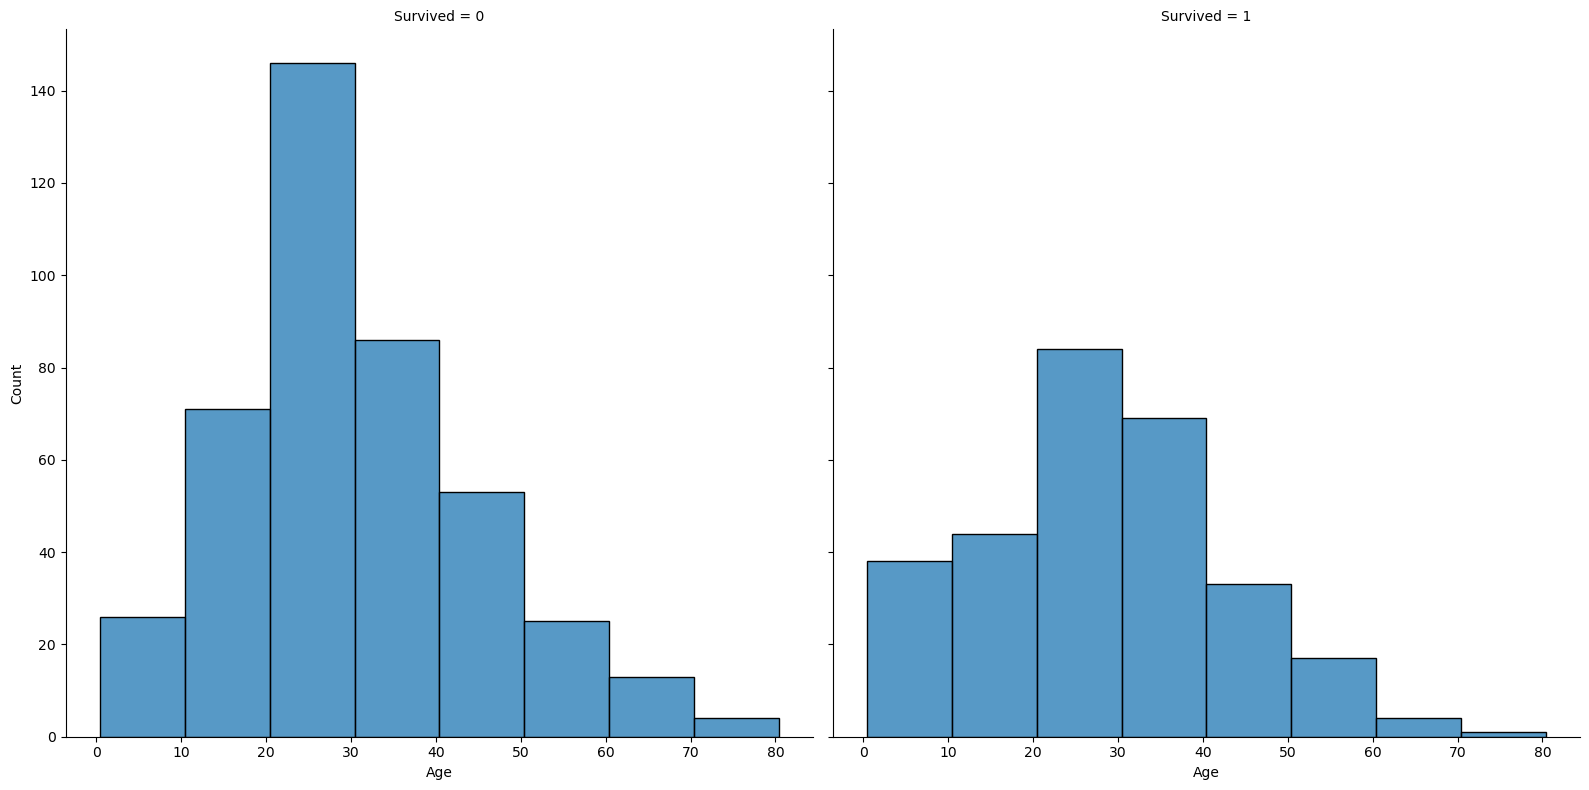

In [17]:
sns.displot(train_df, x="Age", col="Survived", binwidth=10, height=8)

In [18]:
train_df["Age Cut"] = pd.qcut(train_df["Age"], 8)
test_df["Age Cut"] = pd.qcut(test_df["Age"], 8)

In [19]:
train_df.groupby(["Age Cut"], as_index=False)["Survived"].mean()

/var/folders/jz/_79rhvcd7cq6969258m4bw2c0000gn/T/ipykernel_85404/906304946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Age Cut"], as_index=False)["Survived"].mean()


,Age Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [20]:
train_df.loc[train_df["Age"] <= 16, 'Age'] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 20.125), 'Age'] = 1
train_df.loc[(train_df["Age"] > 20.125) & (train_df["Age"] <= 24), 'Age'] = 2
train_df.loc[(train_df["Age"] > 24) & (train_df["Age"] <= 28), 'Age'] = 3
train_df.loc[(train_df["Age"] > 28) & (train_df["Age"] <= 32.312), 'Age'] = 4
train_df.loc[(train_df["Age"] > 32.312) & (train_df["Age"] <= 38), 'Age'] = 5
train_df.loc[(train_df["Age"] > 38) & (train_df["Age"] <= 47), 'Age'] = 6
train_df.loc[(train_df["Age"] > 47) & (train_df["Age"] <= 80), 'Age'] = 7


test_df.loc[test_df["Age"] <= 16, 'Age'] = 0
test_df.loc[(test_df["Age"] > 16) & (test_df["Age"] <= 20.125), 'Age'] = 1
test_df.loc[(test_df["Age"] > 20.125) & (test_df["Age"] <= 24), 'Age'] = 2
test_df.loc[(test_df["Age"] > 24) & (test_df["Age"] <= 28), 'Age'] = 3
test_df.loc[(test_df["Age"] > 28) & (test_df["Age"] <= 32.312), 'Age'] = 4
test_df.loc[(test_df["Age"] > 32.312) & (test_df["Age"] <= 38), 'Age'] = 5
test_df.loc[(test_df["Age"] > 38) & (test_df["Age"] <= 47), 'Age'] = 6
test_df.loc[(test_df["Age"] > 47) & (test_df["Age"] <= 80), 'Age'] = 6
 

In [21]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Family Size Mapped,Age Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Single,"(32.312, 38.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Single,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,7.0,0,0,17463,51.8625,E46,S,1,Single,"(47.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,S,5,Medium,"(0.419, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3.0,0,2,347742,11.1333,NaN,S,3,Small,"(24.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,30.0708,NaN,C,2,Small,"(0.419, 16.0]"


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


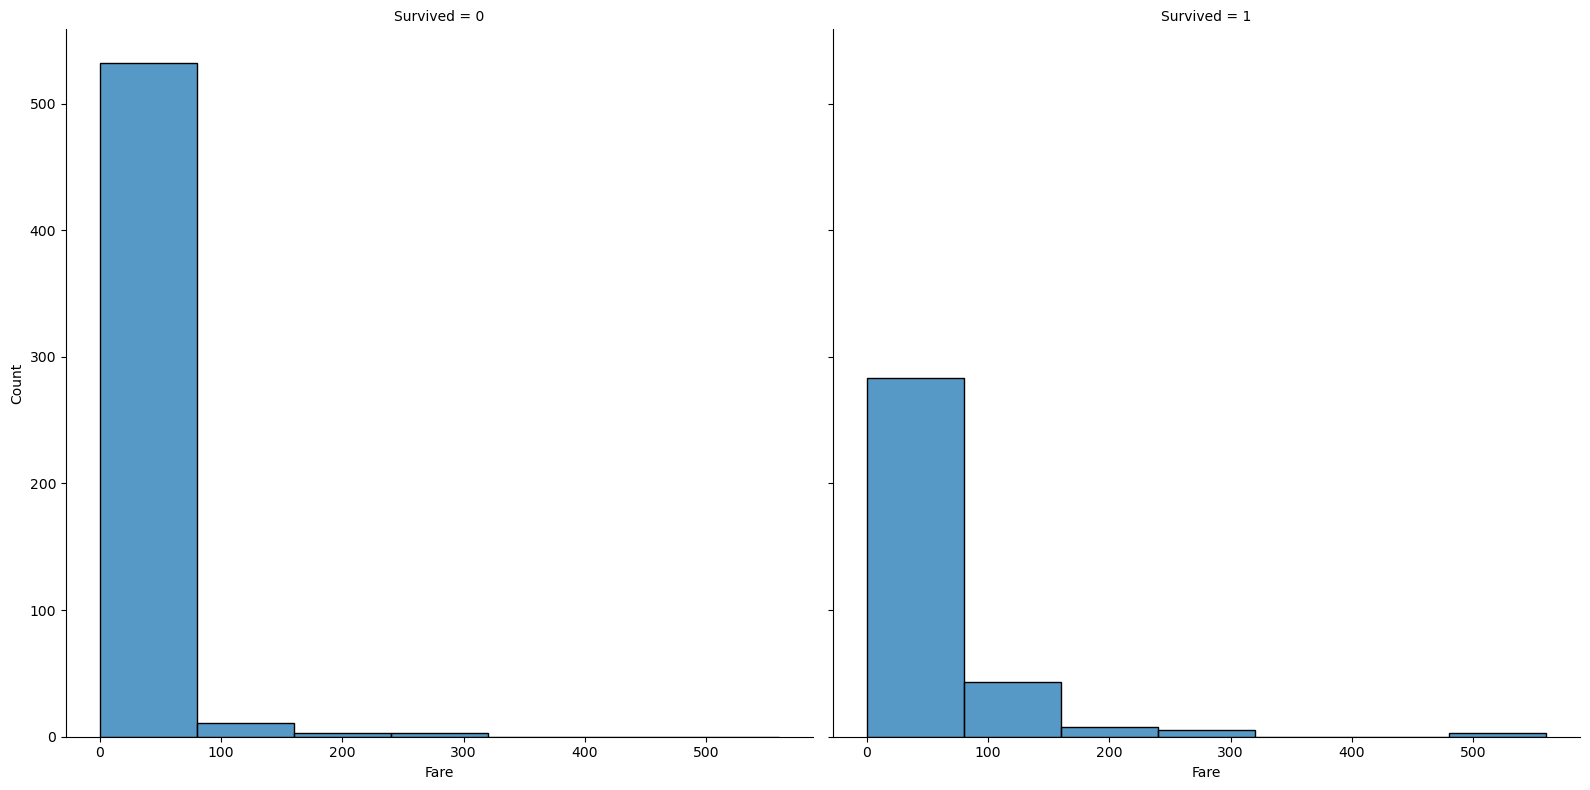

In [22]:
sns.displot(train_df, x="Fare", col="Survived", binwidth=80, height=8)

In [23]:
train_df["Fare Cut"] = pd.qcut(train_df["Fare"], 6)
test_df["Fare Cut"] = pd.qcut(test_df["Fare"], 6)

In [24]:
train_df.groupby(["Fare Cut"], as_index=False)["Survived"].mean()

/var/folders/jz/_79rhvcd7cq6969258m4bw2c0000gn/T/ipykernel_85404/2952721541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Fare Cut"], as_index=False)["Survived"].mean()


,Fare Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [25]:
train_df.loc[train_df["Fare"] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df["Fare"] > 7.775) & (train_df["Fare"] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df["Fare"] > 8.662) & (train_df["Fare"] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df["Fare"] > 14.454) & (train_df["Fare"] <= 26), 'Fare'] = 3
train_df.loc[(train_df["Fare"] > 26) & (train_df["Fare"] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df["Fare"] > 52.369) & (train_df["Fare"] <= 512.329), 'Fare'] = 5


test_df.loc[test_df["Fare"] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df["Fare"] > 7.775) & (test_df["Fare"] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df["Fare"] > 8.662) & (test_df["Fare"] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df["Fare"] > 14.454) & (test_df["Fare"] <= 26), 'Fare'] = 3
test_df.loc[(test_df["Fare"] > 26) & (test_df["Fare"] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df["Fare"] > 52.369) & (test_df["Fare"] <= 512.329), 'Fare'] = 5

In [26]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
train_df["Name"].str.split(pat=",", expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [28]:
title = train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())
train_df["Title"] = title
test_df["Title"] = test_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())

In [29]:
train_df.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [30]:
train_df["Title"] = train_df["Title"].replace({
    'Capt': 'Military',
    'Col': "Military",
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    
})

test_df["Title"] = test_df["Title"].replace({
    'Capt': 'Military',
    'Col': "Military",
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    
})

In [31]:
train_df.groupby(["Title"], as_index=False)["Survived"].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [32]:
train_df["Name Length"] = train_df["Name"].apply(lambda x: len(x))
test_df["Name Length"] = test_df["Name"].apply(lambda x: len(x))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


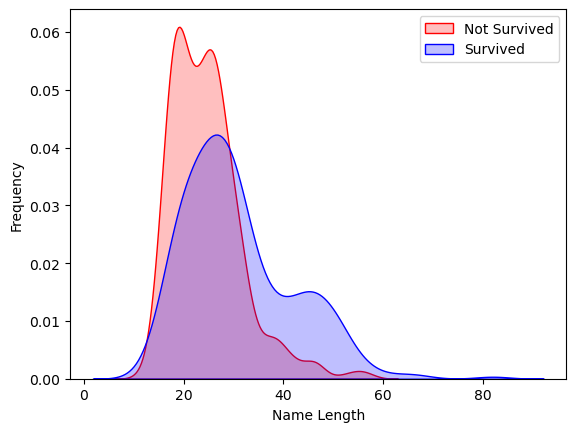

In [33]:
kde = sns.kdeplot(train_df['Name Length'][(train_df['Survived']==0) & (train_df['Name Length'].notnull())], color='Red', fill=True)
kde = sns.kdeplot(train_df['Name Length'][(train_df['Survived']==1) & (train_df['Name Length'].notnull())], ax=kde, color='Blue', fill=True)
kde.set_xlabel('Name Length')
kde.set_ylabel('Frequency')
kde = kde.legend(['Not Survived', 'Survived'])

In [34]:
train_df["Name Length Cut"] = pd.qcut(train_df["Name Length"], 8)
test_df["Name Length Cut"] = pd.qcut(test_df["Name Length"], 8)

In [35]:
train_df.groupby(["Name Length Cut"], as_index=False)["Survived"].mean()

/var/folders/jz/_79rhvcd7cq6969258m4bw2c0000gn/T/ipykernel_85404/2185547973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Name Length Cut"], as_index=False)["Survived"].mean()


,Name Length Cut,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [36]:
train_df.loc[train_df["Name Length"] <= 18, 'Name Size'] = 0
train_df.loc[(train_df["Name Length"] > 18) & (train_df["Name Length"] <= 20.), 'Name Size'] = 1
train_df.loc[(train_df["Name Length"] > 20) & (train_df["Name Length"] <= 23), 'Name Size'] = 2
train_df.loc[(train_df["Name Length"] > 23) & (train_df["Name Length"] <= 25), 'Name Size'] = 3
train_df.loc[(train_df["Name Length"] > 25) & (train_df["Name Length"] <= 27.25), 'Name Size'] = 4
train_df.loc[(train_df["Name Length"] > 27.25) & (train_df["Name Length"] <= 30), 'Name Size'] = 5
train_df.loc[(train_df["Name Length"] > 30) & (train_df["Name Length"] <= 38), 'Name Size'] = 6
train_df.loc[(train_df["Name Length"] > 38) & (train_df["Name Length"] <= 82), 'Name Size'] = 7

test_df.loc[test_df["Name Length"] <= 18, 'Name Size'] = 0
test_df.loc[(test_df["Name Length"] > 18) & (test_df["Name Length"] <= 20.), 'Name Size'] = 1
test_df.loc[(test_df["Name Length"] > 20) & (test_df["Name Length"] <= 23), 'Name Size'] = 2
test_df.loc[(test_df["Name Length"] > 23) & (test_df["Name Length"] <= 25), 'Name Size'] = 3
test_df.loc[(test_df["Name Length"] > 25) & (test_df["Name Length"] <= 27.25), 'Name Size'] = 4
test_df.loc[(test_df["Name Length"] > 27.25) & (test_df["Name Length"] <= 30), 'Name Size'] = 5
test_df.loc[(test_df["Name Length"] > 30) & (test_df["Name Length"] <= 38), 'Name Size'] = 6
test_df.loc[(test_df["Name Length"] > 38) & (test_df["Name Length"] <= 82), 'Name Size'] = 7

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Family Size Mapped,Age Cut,Fare Cut,Title,Name Length,Name Length Cut,Name Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Single,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Single,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [38]:
train_df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [39]:
train_df["Ticket Num"] = train_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))
test_df["Ticket Num"] = test_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))

In [40]:
train_df.groupby(['Ticket Num'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticket Num,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [41]:
train_df["Ticket Num Count"] = train_df.groupby("Ticket Num")["Ticket Num"].transform("count")
test_df["Ticket Num Count"] = test_df.groupby("Ticket Num")["Ticket Num"].transform("count")

In [42]:
train_df.groupby(['Ticket Num Count'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticket Num Count,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [43]:
# checks if 1 index is not null, then grabs the location (indeex 0)
train_df['Ticket Location'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['Ticket Location'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')


In [44]:
train_df["Ticket Location"].value_counts()

Ticket Location
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [45]:

train_df['Ticket Location'] = train_df['Ticket Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['Ticket Location'] = test_df['Ticket Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family Size Mapped,Age Cut,Fare Cut,Title,Name Length,Name Length Cut,Name Size,Ticket Num,Ticket Num Count,Ticket Location
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,Single,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,Single,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank


In [47]:
# not much corelation or volume to back it, won't include in model
train_df.groupby(['Ticket Location'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticket Location,count,mean
4,Blank,665,0.383459
12,PC,60,0.650000
7,CA,41,0.341463
1,A/5,21,0.095238
26,SOTON/OQ,15,0.133333
27,STON/O,12,0.416667
22,SC/Paris,11,0.454545
31,W/C,10,0.100000
0,A/4,6,0.000000
28,STON/O2.,6,0.500000


In [48]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [49]:
train_df.groupby(["Cabin"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [50]:
train_df['Cabin Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [51]:
train_df.groupby(["Cabin Assigned"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age Cut,Fare Cut,Title,Name Length,Name Length Cut,Name Size,Ticket Num,Ticket Num Count,Ticket Location,Cabin Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family Size         891 non-null    int64   
 13  Family Size Mapped  891 non-null    object  
 14  Age Cut             714 non-null    category
 15  Fare Cut            891 non-null    cate

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Family Size         418 non-null    int64   
 12  Family Size Mapped  418 non-null    object  
 13  Age Cut             332 non-null    category
 14  Fare Cut            417 non-null    category
 15  Title               418 non-null    obje

In [55]:
train_df['Age'].fillna(train_df["Age"].mean(), inplace=True)
test_df['Age'].fillna(test_df["Age"].mean(), inplace=True)
test_df['Fare'].fillna(test_df["Fare"].mean(), inplace=True)

In [56]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [57]:
ode_cols = ['Family Size Mapped']
ohe_cols = ['Sex', 'Embarked']

In [58]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
X_test = test_df.drop(["Age Cut", "Fare Cut"], axis=1)

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

In [60]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [61]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [62]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'Cabin Assigned', 'Name Size', 'Age', 'Fare', 'Ticket Num Count'])
],
    remainder='drop',
    n_jobs=-1)

In [63]:
rfc = RandomForestClassifier()

In [64]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}


In [135]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [139]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)

In [141]:
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family Size Mapped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                  ['Pclass', 'Cabin Assigned',
                                                   'Name Size', 'Age', 'Fare',
                                                   'Ticket Num Count'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [142]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.8342558849601103


In [149]:
dtc = DecisionTreeClassifier()

In [153]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [155]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [159]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family Size Mapped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin Assigned',
                                                   'Name Size', 'Age', 'Fare',
                                                   'Ticket Num Count'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [165]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8187924751305033


In [169]:
Y_pred1 = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)

In [177]:
submission1 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred1
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

In [179]:
submission1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [181]:
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
